In [230]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
import math

# Functions

In [266]:
def dist(a, b):
    return math.sqrt((a[0]-b[0])**2 +(a[1]-b[1])**2 )


def Thor_step(x_T, y_T):
    
    directions = []  # Possible directions
    #conditions to not leave the bounds
    if y_T[-1] != 0.5:
        directions += ["DOWN"]
    if y_T[-1] != n-0.5:
        directions += ["UP"]
    if x_T[-1] != 0.5:
        directions += ["LEFT"]
    if x_T[-1] != n-0.5:
        directions += ["RIGHT"]
        
    step = random.choice(directions)
    
    # Update the coordinates based on the chosen direction
    if step == "RIGHT":
        x = np.append(x_T, x_T[-1] + 1)
        y = np.append(y_T, y_T[-1])
    elif step == "LEFT":
        x = np.append(x_T, x_T[-1] - 1)
        y = np.append(y_T, y_T[-1])
    elif step == "UP":
        x = np.append(x_T, x_T[-1] )
        y = np.append(y_T, y_T[-1]+ 1)
    elif step == "DOWN":
        x = np.append(x_T, x_T[-1] )
        y = np.append(y_T, y_T[-1]- 1)

    return x, y 


def Loki_step(x_L, y_L, x_s, y_s):
    global stop_game
    
    directions = []  # Possible directions
    #conditions to not leave the bounds
    if y_L[-1] != 0.5:
        directions += ["DOWN"]
    if y_L[-1] != n-0.5:
        directions += ["UP"]
    if x_L[-1] != 0.5:
        directions += ["LEFT"]
    if x_L[-1] != n-0.5:
        directions += ["RIGHT"]
    
    R_coords = {'UP':(x_L[-1],y_L[-1]+1), 'DOWN':(x_L[-1],y_L[-1]-1), 'LEFT':(x_L[-1]-1,y_L[-1]), 'RIGHT':(x_L[-1]+1,y_L[-1])}
    
    if (x_s, y_s) in R_coords.values():
        step = [i for i in R_coords if R_coords[i]==(x_s, y_s)]
        stop_game = True
    else: 
        Total_weights = 0
        for i in directions:
            Total_weights += 1/(dist((x_s, y_s), R_coords[i]))

        weightss = []
        for i in directions:
            weightss += [(1/dist((x_s, y_s), R_coords[i]))/Total_weights]

        step = random.choices(directions, weights=weightss, k=1)

    # Update the coordinates based on the chosen direction
    if step[0] == "RIGHT":
        x = np.append(x_L, x_L[-1] + 1)
        y = np.append(y_L, y_L[-1])
    elif step[0] == "LEFT":
        x = np.append(x_L, x_L[-1] - 1)
        y = np.append(y_L, y_L[-1])
    elif step[0] == "UP":
        x = np.append(x_L, x_L[-1] )
        y = np.append(y_L, y_L[-1]+ 1)
    elif step[0] == "DOWN":
        x = np.append(x_L, x_L[-1] )
        y = np.append(y_L, y_L[-1]- 1)

    return x, y 


def run_game(x_L, y_L, x_T, y_T, x_s, y_s):
    global stop_game
    while stop_game == False:
        stp_T = Thor_step(x_T, y_T)
        x_T_next = stp_T[0]
        y_T_next = stp_T[1]
        x_T = x_T_next
        y_T = y_T_next

        stp_L = Loki_step(x_L, y_L, x_s, y_s)
        x_L_next = stp_L[0]
        y_L_next = stp_L[1]
        x_L = x_L_next
        y_L = y_L_next

        if (x_T[-1], y_T[-1]) == (x_L[-1], y_L[-1]):
            stop_game = True

    dot_size = int(500/n)

    fig = plt.figure(figsize = [10,10])
    ax = fig.add_subplot(1, 1, 1)

    grid_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(grid_ticks)
    ax.set_yticks(grid_ticks)
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.5,alpha=0.5)

    plt.plot([0,0,n,n,0], [0,n,n,0,0])
    plt.plot(x_s, y_s, marker="o", markersize=dot_size, markeredgecolor="red", markerfacecolor="red")
    plt.plot(x_T[0], y_T[0], marker="o", markersize=dot_size, markeredgecolor="blue", markerfacecolor="blue")
    plt.plot(x_L[0], y_L[0], marker="o", markersize=dot_size, markeredgecolor="black", markerfacecolor="black")
    plt.plot(x_T, y_T, color='b')
    plt.plot(x_L, y_L, color='k')

    plt.show()
    
    x_L = np.array([x_L[0]])
    y_L = np.array([y_L[0]])

    x_T = np.array([x_T[0]])
    y_T = np.array([y_T[0]])

# The game

In [332]:
n = 20 #define the size of the square

In [333]:
#run this to get new starting positions

x_s = random.randint(1, n)-0.5
y_s = random.randint(1, n)-0.5

x_L = np.array([random.randint(1, n)-0.5])
y_L = np.array([random.randint(1, n)-0.5])

x_T = np.array([random.randint(1, n)-0.5])
y_T = np.array([random.randint(1, n)-0.5])

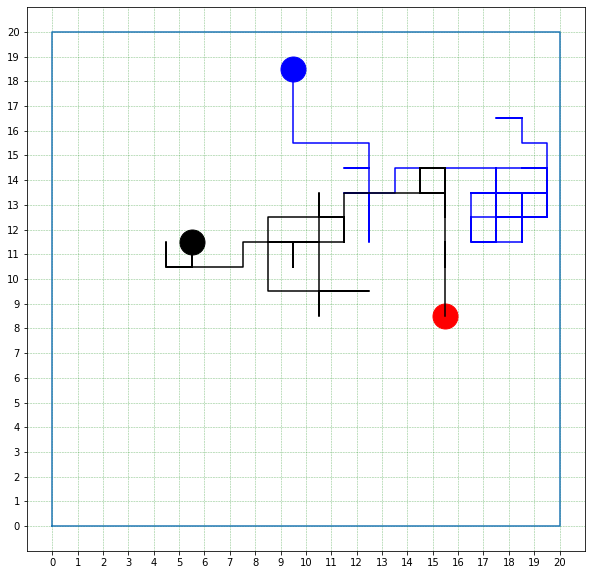

In [336]:
#run this to play a round

stop_game = False
run_game(x_L, y_L, x_T, y_T, x_s, y_s)